In [4]:
import numpy as np
import ionize_analysis as ia
import vsim_plots as vp
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,"../../python/")
import vsim.load as load
import vsim.analyze as analyze
from importlib import reload as rel

In [2]:
simPath = "/media/keenan/Data_Storage/VSim/Recombination/09_07_run/"
simName = "recomb"

In [3]:
elec_data, Ar0_data, Ar1_data, Ar2_data, t = ia.get_ArRecomb_data(1, 9, simPath, simName)

In [53]:
vp = rel(vp)

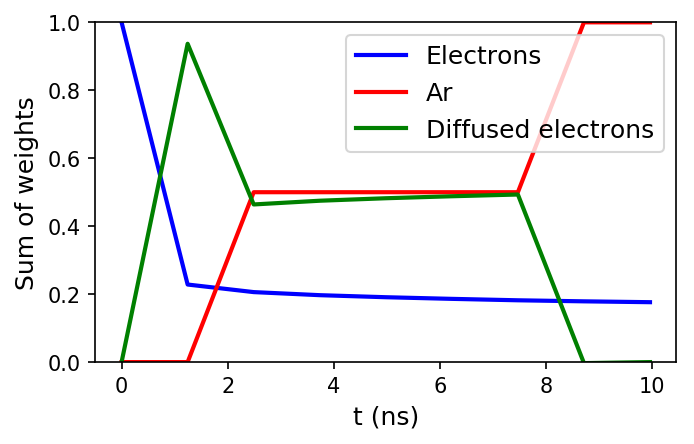

In [54]:
vp.plot_weights(elec_data, Ar0_data, 1, t)

In [52]:
t * 1e9


array([ 0.        ,  1.24521214,  2.49042428,  3.73563643,  4.98084857,
        6.22606071,  7.47127285,  8.716485  ,  9.96169714])